In [3]:
import os 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

## <span style ='color:blue'> Analysis and creation of the data frame

In [4]:
df_prod=pd.read_csv('../Data/raw/amazon_products.csv')
df_cat=pd.read_csv('../Data/raw/amazon_categories.csv')

df=pd.merge(df_prod, df_cat,  how='left', left_on=['category_id'], right_on = ['id'])

df.drop("category_id",axis=1,inplace=True)
# Removal of 'category_id' since this information is already present in the 'id' column

In [5]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   isBestSeller       1426337 non-null  bool   
 9   boughtInLastMonth  1426337 non-null  int64  
 10  id                 1426337 non-null  int64  
 11  category_name      1426337 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 121.1+ MB


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,isBestSeller,boughtInLastMonth,id,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,False,2000,104,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,False,1000,104,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,False,300,104,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,False,400,104,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,False,400,104,Suitcases


In [6]:
# Checking how many null values are present in 'price' and 'stars'
nbr_0=(df[['price','stars']]==0).sum()
print(nbr_0)
print("------------------")
nbr_0_prct= (df[['price','stars']]==0).sum()/len(df)*100
print(nbr_0_prct)

price     32772
stars    131023
dtype: int64
------------------
price    2.297634
stars    9.185978
dtype: float64


In [7]:
# number of missing values
na_nbr=df.isna().sum()
print(na_nbr)

asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
isBestSeller         0
boughtInLastMonth    0
id                   0
category_name        0
dtype: int64


In [6]:
df['stars']=df['stars'].replace(0, np.nan)
df['price']=df['price'].replace(0, np.nan)

## data frame export
df.to_csv('../Data/out/amazon_data.csv',index=False)

## <span style ='color:blue'> Visualization of the data frame

In [8]:
TopRev=df.sort_values(by='reviews',ascending=False)
TopRev[['asin','title','reviews']].head(10)

,asin,title,reviews
1070592,B00T0C9XRK,essence | Lash Princess False Lash Effect Masc...,346563
47104,B09MV3KMPT,"ThisWorx Cordless Car Vacuum - Portable, Mini ...",292474
1075493,B07VMNJHBK,Full Size Sheet Set - Breathable & Cooling She...,281661
1075468,B09JVTQKDN,Queen Size Sheet Set - Breathable & Cooling Sh...,281661
1075466,B07PH22TG9,Queen Size Sheet Set - Breathable & Cooling Sh...,281661
116788,B07X6C9RMF,Blink Mini – Compact indoor plug-in smart secu...,260659
1070627,B004Y9GTOO,Maybelline New York Instant Age Rewind Eraser ...,194051
104930,B07KKXQNMY,Schick Hydro Silk Touch-Up Exfoliating Dermapl...,183726
52987,B07WVFCVJN,Roku Express | HD Roku Streaming Device with S...,177760
65089,B09N3ZNHTY,BOAT Airdopes 141 Bluetooth Truly Wireless in ...,174524


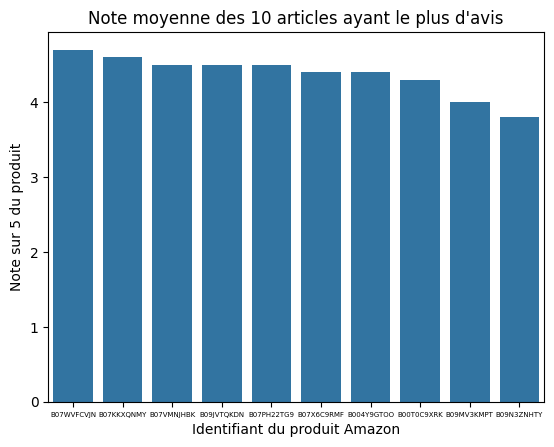

In [10]:

Top10=TopRev.head(10).sort_values(by='stars',ascending=False)

graph1=sns.barplot(Top10,x='asin',y='stars')
graph1.set_title("Note moyenne des 10 articles ayant le plus d'avis")
plt.xlabel('Identifiant du produit Amazon')
plt.ylabel('Note sur 5 du produit')
plt.xticks(fontsize=5)
plt.show(graph1)

In [11]:
Group_cat=df.groupby('category_name').mean('price')
MostExp_cat=Group_cat.sort_values('price',ascending=False)
MostExp_cat[['price','stars']].head(15)

,price,stars
category_name,,
Computer Servers,1534.224685,0.645105
Computers & Tablets,544.380915,3.241583
Smart Home: Home Entertainment,347.994205,4.301136
Luggage Sets,229.588792,3.830872
Smart Home: Vacuums and Mops,221.128077,3.935897
Smart Home - Heating & Cooling,220.455233,3.947670
Computer Monitors,219.811412,2.967634
Computer External Components,163.548317,2.617870
Video Projectors,161.998471,3.087097


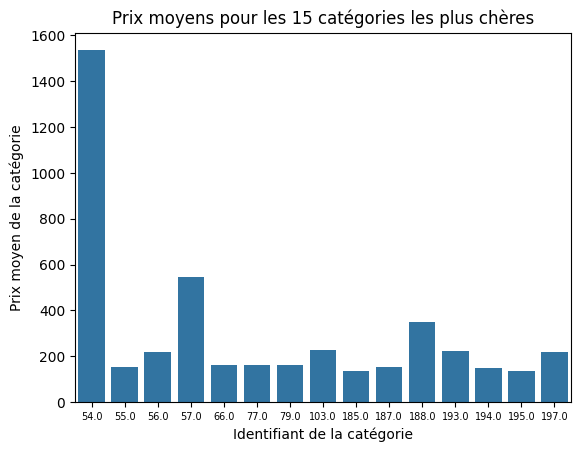

In [12]:
graph2=sns.barplot(MostExp_cat.head(15),x='id',y='price')
plt.xticks(fontsize=7)
graph2.set_title('Prix moyens pour les 15 catégories les plus chères')
plt.xlabel('Identifiant de la catégorie')
plt.ylabel('Prix moyen de la catégorie')
plt.show(graph2)

In [13]:

IsBS=df.loc[(df['isBestSeller']==True)&(df['stars']<4)]
IsBS[['title','isBestSeller','stars']].head(5)

,title,isBestSeller,stars
9503,Men Classic Fit Dress Pant Casual Flat Front P...,True,0.0
25909,"Men's Sneaker, Smoke Grey White Dk Smoke Grey, 12",True,0.0
50974,"Digital TV Converter Box, ATSC Cabal Box - ZJB...",True,3.8
51329,Bobtot Home Theater Systems Surround Sound Spe...,True,3.9
109032,"BELLA BAYS Copper Tubing 1/2"" OD x 7/16"" ID x ...",True,0.0


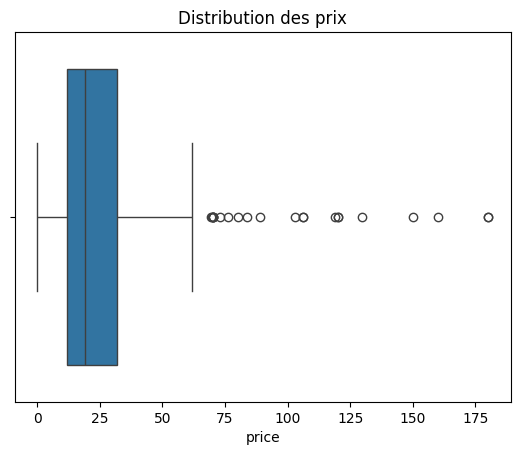

Médiane:  18.99 | 1er Quartile:  11.95 | 3ème Quartile:  31.97


In [14]:

graph3=sns.boxplot(IsBS,x='price')
graph3.set_title('Distribution des prix')
plt.show()

pmed=IsBS['price'].median()
Q1=IsBS['price'].quantile(0.25)
Q3=IsBS['price'].quantile(0.75)
print ('Médiane: ',pmed ,'| 1er Quartile: ', Q1,'| 3ème Quartile: ', Q3)

In [52]:
# Sorting data by units sold
MostSell=IsBS.sort_values('boughtInLastMonth',ascending=False)
MostSell[['price','boughtInLastMonth','category_name']].head(5)

,price,boughtInLastMonth,category_name
466031,20.69,100000,Oral Care Products
330154,16.95,20000,Perfumes & Fragrances
922209,7.99,20000,Kitchen & Bath Fixtures
365770,4.99,20000,Health & Household
724853,29.98,10000,Toy Figures & Playsets


Text(0.5, 1.0, 'Matrice de Corrélation')

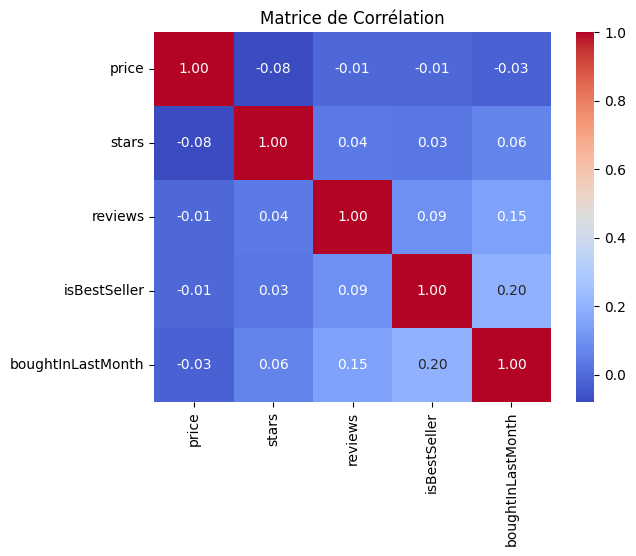

In [15]:
# Relevant data selection for correlation
Var=df[['price','stars','reviews','isBestSeller','boughtInLastMonth']]
# Correlation matrix (+ heatmap)
sns.heatmap(Var.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Matrice de Corrélation')